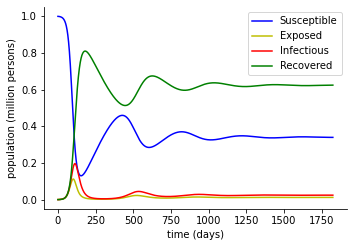

max error = 1.0700012919802022


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(xi,yi,**par): 
    Si,Ei,Ii,Ri = yi[0],yi[1],yi[2],yi[3] 
    mu = par["mu"]
    beta = par["beta"]
    gamma = par["gamma"]
    alpha = par["alpha"]
    omega=par["omega"]
    sigma = par["sigma"]
    N = par["N"]
    f_=[
      mu*N - beta*Ii*Si/N + omega*Ri - mu*Si,
      beta*Ii*Si/N - sigma*Ei - mu*Ei,
      sigma*Ei - gamma*Ii - (mu+alpha)*Ii,
      gamma*Ii - omega*Ri - mu*Ri  
    ]
    return f_

def k1(xi,yi,**par):
    return f(xi,yi,**par)

def k2(xi,yi,**par):
    h = par["h"]
    x_ = xi + h/2
    y_ = [yi_ + k1_*h/2 for yi_,k1_ in zip(yi,k1(xi,yi,**par))]
    return f(x_,y_,**par)

def k3(xi,yi,**par):
    h = par["h"]
    x_ = xi + h/2
    y_ = [yi_ + k2_*h/2 for yi_,k2_ in zip(yi,k2(xi,yi,**par))]
    return f(x_,y_,**par)

def k4(xi,yi,**par):
    h = par["h"]
    x_ = xi + h
    y_ = [yi_ + k3_*h for yi_,k3_ in zip(yi,k3(xi,yi,**par))]
    return f(x_,y_,**par)

def yi1(xi,yi,**par):
    h = par["h"]
    yi1_ = [yi_ + (h/6) * (k1_+2*k2_+2*k3_+k4_)
            for yi_,k1_,k2_,k3_,k4_ in zip(yi,k1(xi,yi,**par),k2(xi,yi,**par),
            k3(xi,yi,**par),k4(xi,yi,**par))
            ]
    return yi1_


N = 1
S0 = 0.999
E0=0.001
I0=0
R0=0
mu=1/(76*365)
beta=0.21
gamma=1/14
alpha=0
omega=1/365
sigma=1/7
h = 0.5


T = 5*365
Nsteps = int(T/h)

yy = [[S0,E0,I0,R0]]
tt = [0]
for i in range(1,Nsteps):
    y_ = yy[-1]
    t_ = tt[-1]
    t_new = t_ + h
    y_new = yi1(t_,y_,h=h,mu=mu,beta=beta,gamma=gamma,
                alpha=alpha,omega=omega,sigma=sigma,N=N)
    tt.append(t_new)
    yy.append(y_new)
    
S = [i[0] for i in yy]
E = [i[1] for i in yy]
I = [i[2] for i in yy]
R = [i[3] for i in yy]
t = tt


fig = plt.figure()
ax = fig.add_axes((0.15, 0.15, 0.7, 0.7))
plt.plot(t,S,"b-",label="Susceptible")
plt.plot(t,E,"y-",label="Exposed")
plt.plot(t,I,"r-",label="Infectious")
plt.plot(t,R,"g-",label="Recovered")
plt.xlabel('time (days)')
plt.ylabel('population (million persons)')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.legend()
plt.show()

error_func=[]
for i in range (1,Nsteps):
    error_func.append(np.abs(I[i]-I[i-1])/
                      np.abs(I[i])+np.abs(E[i]-E[i-1])/
                      np.abs(E[i]))
print("max error =",max(error_func))

In [6]:
def f(xi,yi,**par): 
    Si,Ei,Ii,Ri = yi[0],yi[1],yi[2],yi[3] 
    mu = par["mu"]
    beta = par["beta"]
    gamma = par["gamma"]
    alpha = par["alpha"]
    omega=par["omega"]
    sigma = par["sigma"]
    N = par["N"]
    f_=[
      mu*N - beta*Ii*Si/N + omega*Ri - mu*Si,
      beta*Ii*Si/N - sigma*Ei - mu*Ei,
      sigma*Ei - gamma*Ii - (mu+alpha)*Ii,
      gamma*Ii - omega*Ri - mu*Ri  
    ]
    return f_

def k1(xi,yi,**par):
    return f(xi,yi,**par)

def k2(xi,yi,**par):
    h = par["h"]
    x_ = xi + h/2
    y_ = [yi_ + k1_*h/2 for yi_,k1_ in zip(yi,k1(xi,yi,**par))]
    return f(x_,y_,**par)

def k3(xi,yi,**par):
    h = par["h"]
    x_ = xi + h/2
    y_ = [yi_ + k2_*h/2 for yi_,k2_ in zip(yi,k2(xi,yi,**par))]
    return f(x_,y_,**par)

def k4(xi,yi,**par):
    h = par["h"]
    x_ = xi + h
    y_ = [yi_ + k3_*h for yi_,k3_ in zip(yi,k3(xi,yi,**par))]
    return f(x_,y_,**par)

def yi1(xi,yi,**par):
    h = par["h"]
    yi1_ = [yi_ + (h/6) * (k1_+2*k2_+2*k3_+k4_)
            for yi_,k1_,k2_,k3_,k4_ in zip(yi,k1(xi,yi,**par),k2(xi,yi,**par),
            k3(xi,yi,**par),k4(xi,yi,**par))
            ]
    return yi1_


N = 1
S0 = 0.999
E0=0.001
I0=0
R0=0
mu=1/(76*365)
beta=0.21
gamma=1/14
alpha=0
omega=1/365
sigma=1/7
h = 1


T = 5*365
Nsteps = int(T/h)

yy = [[S0,E0,I0,R0]]
tt = [0]
for i in range(1,Nsteps):
    y_ = yy[-1]
    t_ = tt[-1]
    t_new = t_ + h
    y_new = yi1(t_,y_,h=h,mu=mu,beta=beta,gamma=gamma,alpha=alpha,
                omega=omega,sigma=sigma,N=N)
    tt.append(t_new)
    yy.append(y_new)
    
S = [i[0] for i in yy]
E = [i[1] for i in yy]
I = [i[2] for i in yy]
R = [i[3] for i in yy]
t = tt

summ=0
for j in range (Nsteps):
    if j==0:
        summ+=I[j]
    elif j==Nsteps-1:
        summ+=I[j]
    elif j%2==0:
        summ+=2*I[j]
    elif j%2==1:
        summ+=4*I[j]
summ=summ/(3*Nsteps)
print("percentage of infected people is =",summ*100)

error_f4=[]
for i in range(3,Nsteps-3):
    error_f4.append((-I[i+3]+12*I[i+2]-39*I[i+1]+56*I[i]
                     -39*I[i-1]+12*I[i-2]-I[i-3])/(6*h**4))
f4=sum(error_f4)/(Nsteps-6)
print("error =",np.abs((Nsteps-1)**5*f4/(180*Nsteps**4)))

percentage of infected people is = 2.7838616689614124
error = 2.6082952968607676e-08


In [33]:
def f(xi,yi,**par): 
    Si,Ei,Ii,Ri = yi[0],yi[1],yi[2],yi[3] 
    mu = par["mu"]
    beta = par["beta"]
    gamma = par["gamma"]
    alpha = par["alpha"]
    omega=par["omega"]
    sigma = par["sigma"]
    N = par["N"]
    f_=[
      mu*N - beta*Ii*Si/N + omega*Ri - mu*Si,
      beta*Ii*Si/N - sigma*Ei - mu*Ei,
      sigma*Ei - gamma*Ii - (mu+alpha)*Ii,
      gamma*Ii - omega*Ri - mu*Ri  
    ]
    return f_

def k1(xi,yi,**par):
    return f(xi,yi,**par)

def k2(xi,yi,**par):
    h = par["h"]
    x_ = xi + h/2
    y_ = [yi_ + k1_*h/2 for yi_,k1_ in zip(yi,k1(xi,yi,**par))]
    return f(x_,y_,**par)

def k3(xi,yi,**par):
    h = par["h"]
    x_ = xi + h/2
    y_ = [yi_ + k2_*h/2 for yi_,k2_ in zip(yi,k2(xi,yi,**par))]
    return f(x_,y_,**par)

def k4(xi,yi,**par):
    h = par["h"]
    x_ = xi + h
    y_ = [yi_ + k3_*h for yi_,k3_ in zip(yi,k3(xi,yi,**par))]
    return f(x_,y_,**par)

def yi1(xi,yi,**par):
    h = par["h"]
    yi1_ = [yi_ + (h/6) * (k1_+2*k2_+2*k3_+k4_)
            for yi_,k1_,k2_,k3_,k4_ in zip(yi,k1(xi,yi,**par),k2(xi,yi,**par),
            k3(xi,yi,**par),k4(xi,yi,**par))
            ]
    return yi1_


N = 1
S0 = 0.999
E0=0.001
I0=0
R0=0
mu=1/(76*365)
beta=(0.21)/2
gamma=1/14
alpha=0
omega=1/365
sigma=1/7
h = 1


T = 5*365
Nsteps = int(T/h)

yy = [[S0,E0,I0,R0]]
tt = [0]
for i in range(1,Nsteps):
    y_ = yy[-1]
    t_ = tt[-1]
    t_new = t_ + h
    y_new = yi1(t_,y_,h=h,mu=mu,beta=beta,gamma=gamma,alpha=alpha,
                omega=omega,sigma=sigma,N=N)
    tt.append(t_new)
    yy.append(y_new)
    
S = [i[0] for i in yy]
E = [i[1] for i in yy]
I = [i[2] for i in yy]
R = [i[3] for i in yy]
t = tt

summ=0
for j in range (Nsteps):
    if j==0:
        summ+=I[j]
    elif j==Nsteps-1:
        summ+=I[j]
    elif j%2==0:
        summ+=2*I[j]
    elif j%2==1:
        summ+=4*I[j]
summ=summ/(3*Nsteps)
print("percentage of infected people is =",summ*100)

percentage of infected people is = 1.28463437660091


In [36]:
def f(xi,yi,**par): 
    Si,Ei,Ii,Ri = yi[0],yi[1],yi[2],yi[3] 
    mu = par["mu"]
    beta = par["beta"]
    gamma = par["gamma"]
    alpha = par["alpha"]
    omega=par["omega"]
    sigma = par["sigma"]
    N = par["N"]
    f_=[
      mu*N - beta*Ii*Si/N + omega*Ri - mu*Si,
      beta*Ii*Si/N - sigma*Ei - mu*Ei,
      sigma*Ei - gamma*Ii - (mu+alpha)*Ii,
      gamma*Ii - omega*Ri - mu*Ri  
    ]
    return f_

def k1(xi,yi,**par):
    return f(xi,yi,**par)

def k2(xi,yi,**par):
    h = par["h"]
    x_ = xi + h/2
    y_ = [yi_ + k1_*h/2 for yi_,k1_ in zip(yi,k1(xi,yi,**par))]
    return f(x_,y_,**par)

def k3(xi,yi,**par):
    h = par["h"]
    x_ = xi + h/2
    y_ = [yi_ + k2_*h/2 for yi_,k2_ in zip(yi,k2(xi,yi,**par))]
    return f(x_,y_,**par)

def k4(xi,yi,**par):
    h = par["h"]
    x_ = xi + h
    y_ = [yi_ + k3_*h for yi_,k3_ in zip(yi,k3(xi,yi,**par))]
    return f(x_,y_,**par)

def yi1(xi,yi,**par):
    h = par["h"]
    yi1_ = [yi_ + (h/6) * (k1_+2*k2_+2*k3_+k4_)
            for yi_,k1_,k2_,k3_,k4_ in zip(yi,k1(xi,yi,**par),k2(xi,yi,**par),
            k3(xi,yi,**par),k4(xi,yi,**par))
            ]
    return yi1_


N = 1
S0 = 0.999
E0=0.001
I0=0
R0=0
mu=1/(76*365)
beta=0.21
gamma=1/14
alpha=0
omega=1/365
sigma=1/7
h = 1


T = 5*365
Nsteps = int(T/h)

yy = [[S0,E0,I0,R0]]
tt = [0]
for i in range(1,Nsteps):
    y_ = yy[-1]
    t_ = tt[-1]
    t_new = t_ + h
    y_new = yi1(t_,y_,h=h,mu=mu,beta=beta,gamma=gamma,alpha=alpha,
                omega=omega,sigma=sigma,N=N)
    tt.append(t_new)
    yy.append(y_new)
    
S = [i[0] for i in yy]
E = [i[1] for i in yy]
I = [i[2] for i in yy]
R = [i[3] for i in yy]
t = tt

I_derivative=[]
I_derivative.append((I[2]-I[0])/(2*h))
for i in range(2,Nsteps-2):
    I_derivative.append((-I[i+2]+8*I[i+1]-8*I[i-1]+I[i-2])/(12*h))
I_derivative.append((I[Nsteps-1]-I[Nsteps-3])/(2*h))
for j in range(Nsteps-3):
    if (I_derivative[j]*I_derivative[j+1]<0):
        print("num of day:",j+1)
        break
        
        
import math
from sympy import symbols
x=symbols('x')
X=[]
for i in range(110,114):
    X.append(i+1)
Pn=0
for i in range (0,4):
    Li=1
    for j in range (0,4):
        if(j!=i):
            Li*=(x-X[j])/(X[i]-X[j])
    Pn+=I[i+110]*Li
Pn_prime=Pn.diff(x)


Xn=100
n=0
def NEW_RAPH (t):
    fx=Pn_prime.evalf(subs={x:t})
    return fx
def NEW_RAPH_derivative (t):
    df1=Pn_prime.diff(x)
    df=df1.evalf(subs={x:t})
    return df
while True:
    FXn=NEW_RAPH(Xn)
    fXn=NEW_RAPH_derivative(Xn)
    Xn1=Xn-(FXn/fXn)
    FXn1=NEW_RAPH(Xn1)
    n+=1
    if(abs(FXn1-FXn)>0.005):
        Xn=Xn1
    else:
        break
print("max =",I[math.floor(Xn1)])

num of day: 112
max = 0.19640596986414016
